In [1]:
# Dataset Link 
 
# https://archive.ics.uci.edu/ml/machine-learning-databases/adult/ 
 
# Problem 1: 
# Prediction task is to determine whether a person makes over 50K a year. 
 
# Problem 2: 
# Which factors are important 
 
# Problem 3: 
# Which algorithms are best for this dataset 

In [48]:
#Import the packages 
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt 
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import plot_tree
from sklearn.metrics import accuracy_score
from xgboost.sklearn import XGBClassifier
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

import os
os.chdir("C:\\Users\\HP\\Desktop\\Learning\\DataScience\\01Materials\\26.PROJECT-3 APPLICATION OF CLASSIFICATION MODELS\\Assignment")

In [49]:
train_set = pd.read_csv('adult_train.data', header = None) 
test_set = pd.read_csv('adult_test.test', skiprows = 1, header = None) 
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation','relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'wage_class'] 
train_set.columns = col_labels 
test_set.columns = col_labels 

In [50]:
# #IMPORT THE DATABASE

# columns = ['Age','Workclass','fnlgwt','Education','Education num','Marital Status',
#            'Occupation','Relationship','Race','Sex','Capital Gain','Capital Loss',
#            'Hours/Week','Native country','Income']
# train = pd.read_csv('adult_train.data', names=columns)
# test = pd.read_csv('adult_test.test', names=columns, skiprows=1)
# train.info()


In [51]:
train_set.head() #Returns the first 5 rows of train_set dataframe

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [52]:
test_set.head() #Returns the first 5 rows of test_set dataframe

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [53]:
train_set.info() #Prints information about train_set dataframe.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education_num     32561 non-null int64
marital_status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
native_country    32561 non-null object
wage_class        32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [54]:
test_set.info() #Prints information about test_set dataframe.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
age               16281 non-null int64
workclass         16281 non-null object
fnlwgt            16281 non-null int64
education         16281 non-null object
education_num     16281 non-null int64
marital_status    16281 non-null object
occupation        16281 non-null object
relationship      16281 non-null object
race              16281 non-null object
sex               16281 non-null object
capital_gain      16281 non-null int64
capital_loss      16281 non-null int64
hours_per_week    16281 non-null int64
native_country    16281 non-null object
wage_class        16281 non-null object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


In [55]:
train_set.describe() #The summary statistics of the train_set dataframe

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [56]:
test_set.describe() #The summary statistics of the test_set dataframe

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,16281.000000,1.628100e+04,16281.000000,16281.000000,16281.000000,16281.000000
mean,38.767459,1.894357e+05,10.072907,1081.905104,87.899269,40.392236
std,13.849187,1.057149e+05,2.567545,7583.935968,403.105286,12.479332
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.167360e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.778310e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.383840e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,3770.000000,99.000000


In [57]:
train_set.isnull().values.any() #Check for any NA’s in the dataframe.

False

In [58]:
test_set.isnull().values.any() #Check for any NA’s in the dataframe.

False

In [59]:
train_set['workclass'].value_counts() #Returns object containing counts of unique values

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [60]:
train_set['occupation'].value_counts() #Returns object containing counts of unique values

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [61]:
train_set['native_country'].value_counts() #Returns object containing counts of unique values

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

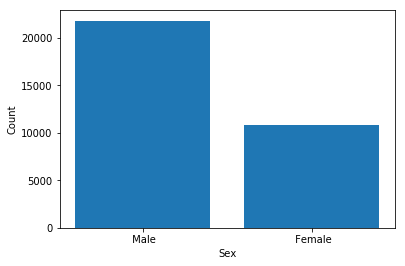

In [62]:
#The distribution of gender in the train_set dataset.  
fig, ax = plt.subplots()  
x = train_set.sex.unique()  
#Counting 'Males' and 'Females' in the dataset  
y = train_set.sex.value_counts()  
#Plotting the bar graph  
ax.bar(x, y)  
ax.set_xlabel('Sex')  
ax.set_ylabel('Count')  
plt.show() 

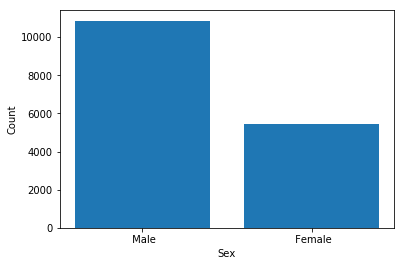

In [63]:
#The distribution of gender in the train_set dataset.  
fig, ax = plt.subplots()  
x = test_set.sex.unique()  
#Counting 'Males' and 'Females' in the dataset  
y = test_set.sex.value_counts()  
#Plotting the bar graph  
ax.bar(x, y)  
ax.set_xlabel('Sex')  
ax.set_ylabel('Count')  
plt.show() 

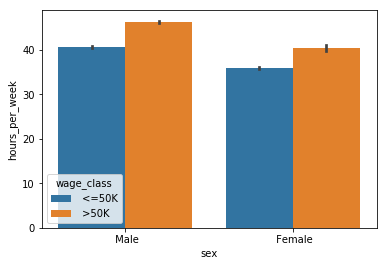

In [64]:
#Bar plot for males and females with wage_class less than 50K tend to work more per week.   
sns.barplot(train_set.sex, train_set['hours_per_week'], hue=train_set['wage_class'])  
plt.show()

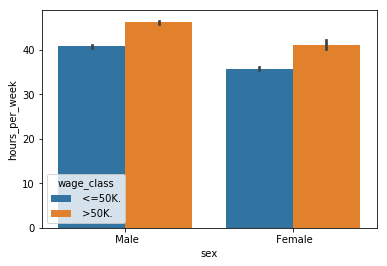

In [65]:
#Bar plot for males and females with wage_class less than 50K tend to work more per week.   
sns.barplot(test_set.sex, test_set['hours_per_week'], hue=test_set['wage_class'])  
plt.show()

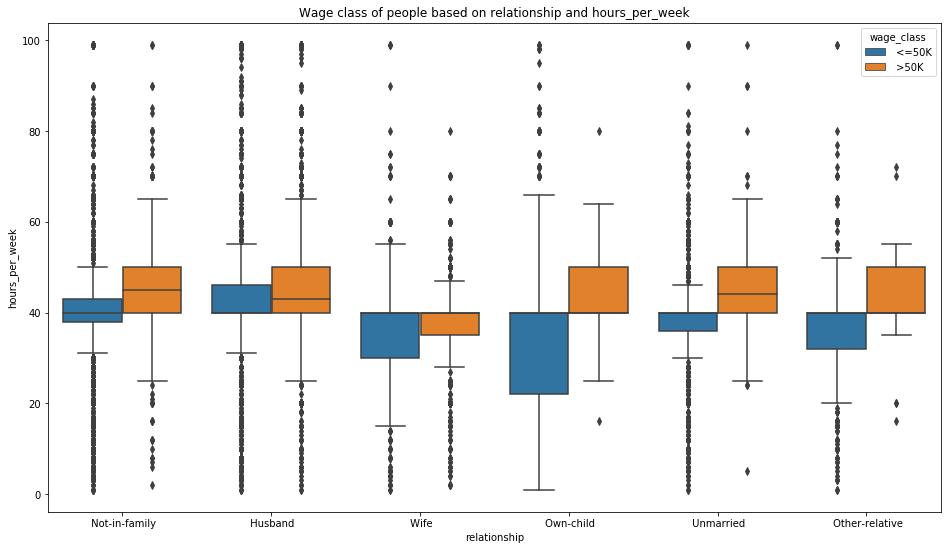

In [66]:
#Creating a box plot for train_set
fig, ax = plt.subplots(figsize=(16, 9))  
sns.boxplot(x='relationship', y='hours_per_week', hue='wage_class', data=train_set, ax=ax)  
ax.set_title('Wage class of people based on relationship and hours_per_week')  
plt.show()

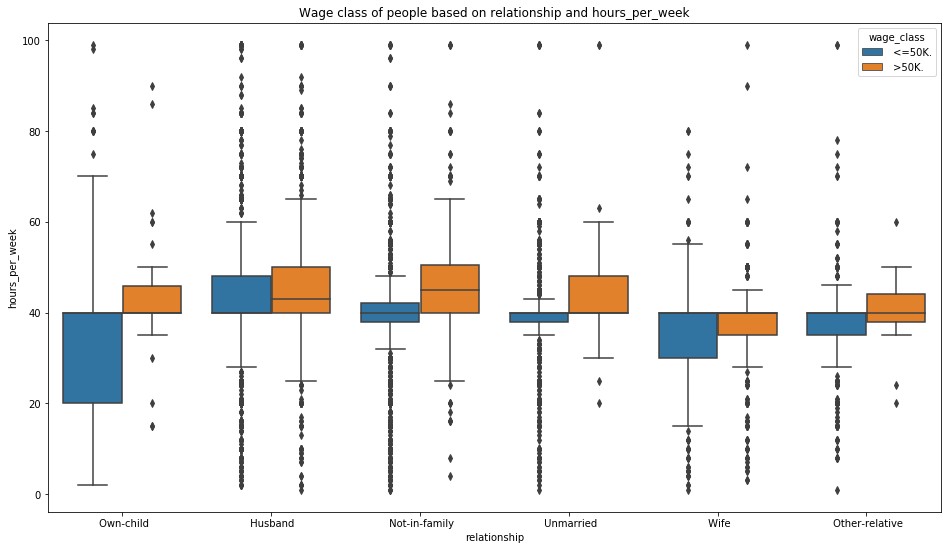

In [67]:
#Creating a box plot for test_set
fig, ax = plt.subplots(figsize=(16, 9))  
sns.boxplot(x='relationship', y='hours_per_week', hue='wage_class', data=test_set, ax=ax)  
ax.set_title('Wage class of people based on relationship and hours_per_week')  
plt.show()

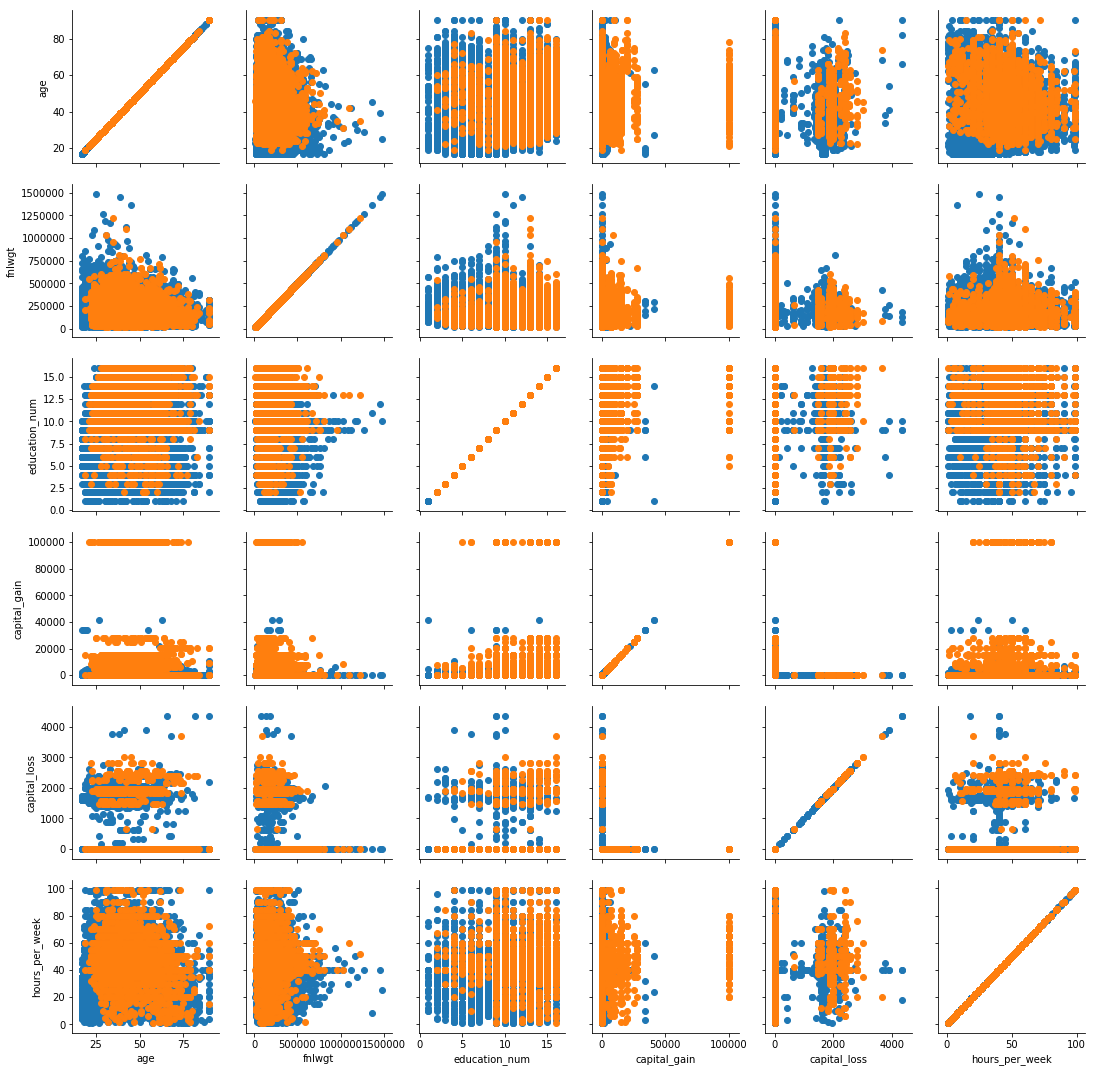

In [68]:
#Creating a scatter plots for all pairs of variables of train_set.
pg = sns.PairGrid(data=train_set, hue='wage_class')
pg.map(plt.scatter) 

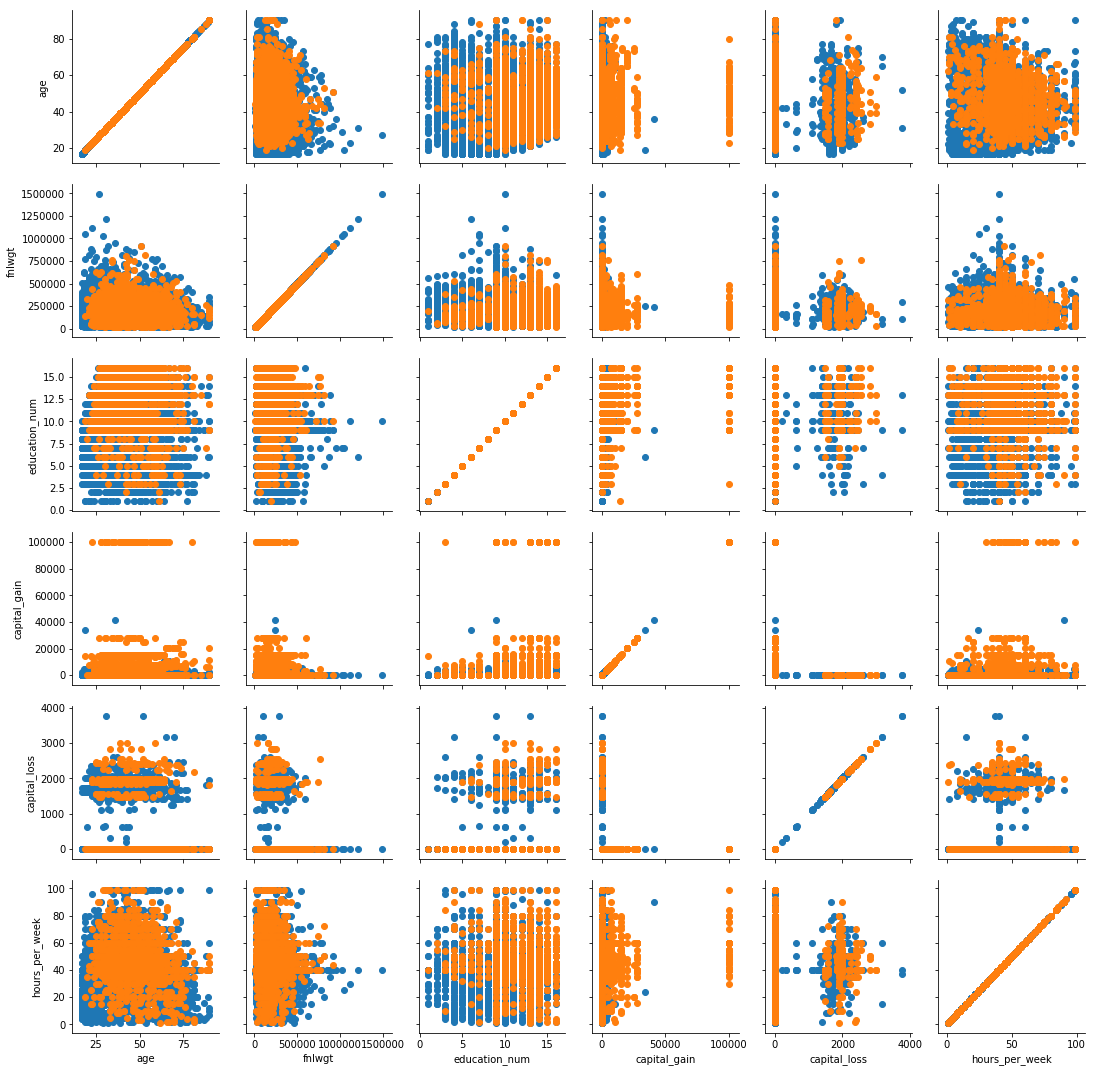

In [69]:
#Creating a scatter plots for all pairs of variables of test_set.
pg = sns.PairGrid(data=test_set, hue='wage_class')
pg.map(plt.scatter)

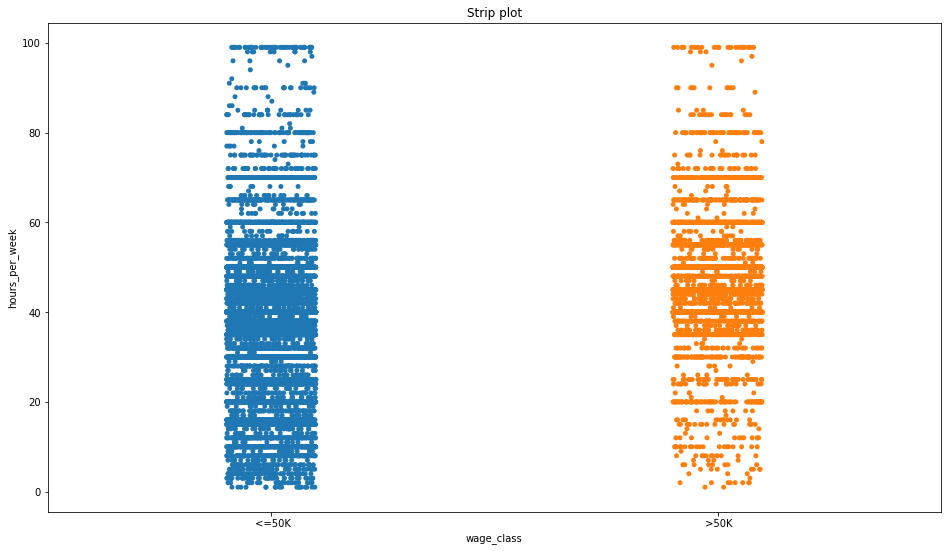

In [70]:
#Using Strip plot to visualize the train_set.  
fig, ax= plt.subplots(figsize=(16, 9))  
sns.stripplot(train_set['wage_class'], train_set['hours_per_week'], jitter=True, ax=ax)  
ax.set_title('Strip plot')  
plt.show()  

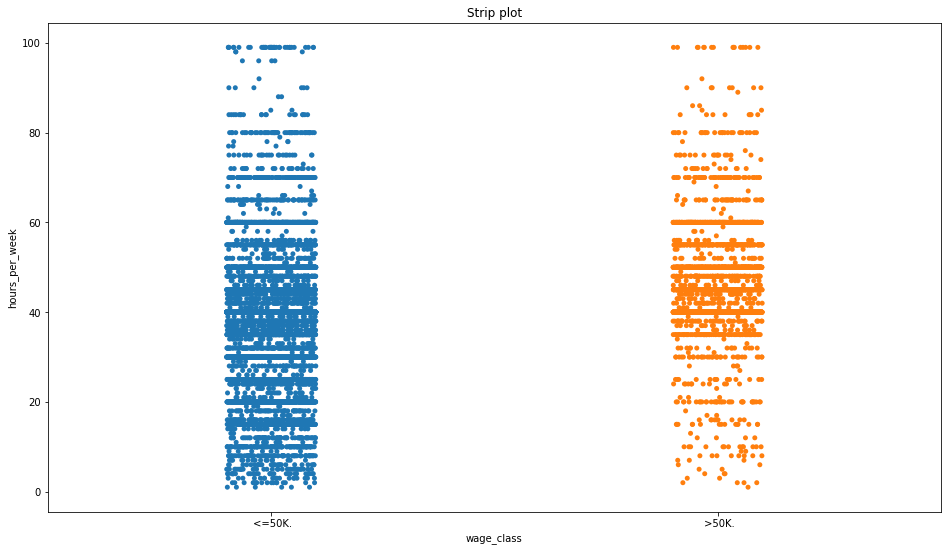

In [71]:
#Using Strip plot to visualize the test_set.  
fig, ax= plt.subplots(figsize=(16, 9))  
sns.stripplot(test_set['wage_class'], test_set['hours_per_week'], jitter=True, ax=ax)  
ax.set_title('Strip plot')  
plt.show() 

In [72]:
train_set_new = train_set.replace({' ?':np.nan}) #Replaces ' ?' with NaN

In [73]:
train_set_new.isnull().values.any() #Check for any NA’s in the dataframe.

True

In [74]:
train_set_new.isnull().sum() #Checks null values in dataframe and prints the sum

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
wage_class           0
dtype: int64

In [75]:
train_set_new.fillna('unknown', inplace=True) #Replaces null values with 'unknown'

In [76]:
train_set_new.isnull().values.any() #Check for any NA’s in the dataframe.

False

In [77]:
train_set_new.isnull().sum()  #Checks null values in dataframe and prints the sum column wise

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

In [78]:
test_set_new = test_set.replace({' ?':np.nan}) #Replaces ' ?' with NaN

In [79]:
test_set_new.isnull().values.any() #Check for any NA’s in the dataframe.

True

In [80]:
test_set_new.isnull().sum() #Checks null values in dataframe and prints the sum column wise

age                 0
workclass         963
fnlwgt              0
education           0
education_num       0
marital_status      0
occupation        966
relationship        0
race                0
sex                 0
capital_gain        0
capital_loss        0
hours_per_week      0
native_country    274
wage_class          0
dtype: int64

In [81]:
test_set_new.fillna('unknown', inplace=True) #Replaces null values with 'unknown'

In [82]:
test_set_new.isnull().values.any() #Check for any NA’s in the dataframe.

False

In [83]:
test_set_new.isnull().sum() #Checks null values in dataframe and prints the sum column wise

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

In [84]:
train_set_new.head() #Returns the first 5 rows of train_set_new dataframe

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [85]:
test_set_new.head() #Returns the first 5 rows of test_set_new dataframe

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,unknown,103497,Some-college,10,Never-married,unknown,Own-child,White,Female,0,0,30,United-States,<=50K.


In [86]:
#Removes column that I am trying to predict ('wage_class') from features list
train_features = train_set_new.drop('wage_class', axis=1)

#Creates train labels list
train_labels = (train_set_new['wage_class'] == ' >50K')

In [87]:
train_features.head() #Returns the first 5 rows of train_features dataframe

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [88]:
train_labels.unique() #Returns unique values of train_labels.

array([False,  True])

In [89]:
#Remove column that I am trying to predict ('wage_class') from features list
test_features = test_set_new.drop('wage_class', axis=1)

#Creates training labels list
test_labels = (test_set_new['wage_class'] == ' >50K.')

In [90]:
test_features.head() #Returns the first 5 rows of test_features dataframe

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,18,unknown,103497,Some-college,10,Never-married,unknown,Own-child,White,Female,0,0,30,United-States


In [91]:
test_labels.unique() #Return unique values of test_labels.

array([False,  True])

In [92]:
#Categorical columns contain data that need to be turned into numerical values before being used by XGBoost
CATEGORICAL_COLUMNS = (
    'workclass',
    'education',
    'marital_status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'native_country'
)

In [93]:
#Converts data in categorical columns to numerical values
encoders = {col:LabelEncoder() for col in CATEGORICAL_COLUMNS}

for col in CATEGORICAL_COLUMNS:
    train_features[col] = encoders[col].fit_transform(train_features[col])
    test_features[col] = encoders[col].fit_transform(test_features[col]) 

In [94]:
train_features.head() #Returns the first 5 rows of train_features dataframe

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4


In [95]:
test_features.head() #Returns the first 5 rows of test_features dataframe

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,25,3,226802,1,7,4,6,3,2,1,0,0,40,37
1,38,3,89814,11,9,2,4,0,4,1,0,0,50,37
2,28,1,336951,7,12,2,10,0,4,1,0,0,40,37
3,44,3,160323,15,10,2,6,0,2,1,7688,0,40,37
4,18,8,103497,15,10,4,14,3,4,0,0,0,30,37


In [96]:
#Loads data into DMatrix object
dtrain = xgb.DMatrix(train_features, train_labels)
dtest = xgb.DMatrix(test_features, test_labels )

C:\Users\HP\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\HP\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [97]:
print("Train dataset contains {0} rows and {1} columns".format(dtrain.num_row(), dtrain.num_col()))
print("Test dataset contains {0} rows and {1} columns".format(dtest.num_row(), dtest.num_col()))

Train dataset contains 32561 rows and 14 columns
Test dataset contains 16281 rows and 14 columns


In [98]:
print("Train possible labels: ")
print(np.unique(dtrain.get_label()))

print("\nTest possible labels: ")
print(np.unique(dtest.get_label()))

Train possible labels: 
[0. 1.]

Test possible labels: 
[0. 1.]


In [99]:
#Specifies general training parameters
params = {
    'objective': 'binary:logistic',
    'max_depth': 2,
    'learning_rate': 1.0,
    'silent': 1,
    'n_estimators': 5
}

In [100]:
bst = XGBClassifier(**params).fit(train_features, train_labels)

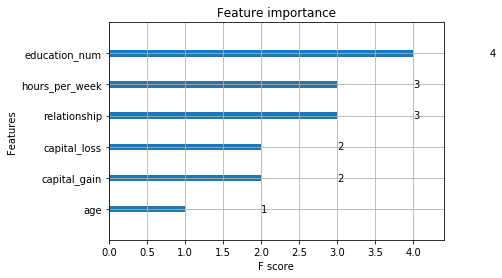

In [101]:
xgb.plot_importance(bst)

In [102]:
preds = bst.predict(test_features)
preds

array([False, False, False, ...,  True, False,  True])

In [103]:
correct = 0

for i in range(len(preds)):
    if (test_labels[i] == preds[i]):
        correct += 1
        
acc = accuracy_score(test_labels, preds)

print('Predicted correctly: {0}/{1}'.format(correct, len(preds)))
print('Error: {0:.4f}'.format(1-acc))

Predicted correctly: 13838/16281
Error: 0.1501


In [104]:
#Specifies general training parameters
params = {
    'objective':'binary:logistic',
    'max_depth':1,
    'silent':1,
    'eta':0.5
}

num_rounds = 5

In [105]:
#Specifies watchlist array to observe it's performance on the both datasets

watchlist  = [(dtest,'test'), (dtrain,'train')]
bst_eval = xgb.train(params, dtrain, num_rounds, watchlist)

[0]	test-error:0.236226	train-error:0.24081
[1]	test-error:0.195074	train-error:0.197383
[2]	test-error:0.198759	train-error:0.201437
[3]	test-error:0.196487	train-error:0.198643
[4]	test-error:0.163074	train-error:0.162556


In [106]:
#Using multiple evaluation metrics such as logloss and auc

params['eval_metric'] = ['logloss', 'auc']
bst_eval = xgb.train(params, dtrain, num_rounds, watchlist)

[0]	test-logloss:0.543497	test-auc:0.736104	train-logloss:0.547068	train-auc:0.730227
[1]	test-logloss:0.477086	test-auc:0.787733	train-logloss:0.480536	train-auc:0.78378
[2]	test-logloss:0.440804	test-auc:0.839844	train-logloss:0.443902	train-auc:0.835836
[3]	test-logloss:0.414571	test-auc:0.851275	train-logloss:0.417868	train-auc:0.850058
[4]	test-logloss:0.401572	test-auc:0.860959	train-logloss:0.404604	train-auc:0.861253


In [107]:
#Custom evaluation metric
def misclassified(pred_probs, dtrain):
    labels = dtrain.get_label() # obtain true labels
    preds = pred_probs > 0.5 # obtain predicted values
    return 'misclassified', np.sum(labels != preds)

In [108]:
bst_eval = xgb.train(params, dtrain, num_rounds, watchlist, feval=misclassified, maximize=False)

[0]	test-logloss:0.543497	test-auc:0.736104	train-logloss:0.547068	train-auc:0.730227	test-misclassified:3846	train-misclassified:7841
[1]	test-logloss:0.477086	test-auc:0.787733	train-logloss:0.480536	train-auc:0.78378	test-misclassified:3176	train-misclassified:6427
[2]	test-logloss:0.440804	test-auc:0.839844	train-logloss:0.443902	train-auc:0.835836	test-misclassified:3236	train-misclassified:6559
[3]	test-logloss:0.414571	test-auc:0.851275	train-logloss:0.417868	train-auc:0.850058	test-misclassified:3199	train-misclassified:6468
[4]	test-logloss:0.401572	test-auc:0.860959	train-logloss:0.404604	train-auc:0.861253	test-misclassified:2655	train-misclassified:5293


In [110]:
# Preparing data for Training and testing 

#Removes column that I am trying to predict ('wage_class') from features list
X = train_features 
#Creates train labels list
y = train_labels  

# # #Splitting data as train and test data 
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.2,random_state = 0)

# print(X_train)
# print(X_test)

In [111]:
#CLASSIFICATION - LOGISTIC REGRESSION

from sklearn.metrics import accuracy_score
lrn = LogisticRegression(penalty = 'l1', C = .001, class_weight='balanced')

lrn.fit(X_train, y_train)
y_pred = lrn.predict(X_test)

print(confusion_matrix(y_test,y_pred))

print(classification_report(y_test,y_pred))

LRA = accuracy_score(y_test, y_pred)
print("The Accuracy for Logistic Regression is {}".format(LRA))

[[3589 1329]
 [ 388 1207]]
              precision    recall  f1-score   support

       False       0.90      0.73      0.81      4918
        True       0.48      0.76      0.58      1595

   micro avg       0.74      0.74      0.74      6513
   macro avg       0.69      0.74      0.70      6513
weighted avg       0.80      0.74      0.75      6513

The Accuracy for Logistic Regression is 0.7363734070320896


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [112]:
#LDA Linear Discriminant Analysis 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics

clf = LinearDiscriminantAnalysis()
clf.fit( X_train, y_train )
tree_predict = clf.predict(X_test)
metrics.accuracy_score( y_test, tree_predict )

print(confusion_matrix(y_test,tree_predict))
print(classification_report(y_test,tree_predict))
LDA = accuracy_score(y_test, tree_predict)
print("The Accuracy for LDA is {}".format(LDA))

[[4620  298]
 [ 934  661]]
              precision    recall  f1-score   support

       False       0.83      0.94      0.88      4918
        True       0.69      0.41      0.52      1595

   micro avg       0.81      0.81      0.81      6513
   macro avg       0.76      0.68      0.70      6513
weighted avg       0.80      0.81      0.79      6513

The Accuracy for LDA is 0.8108398587440504


In [113]:
#LINEAR REGRESSION

from sklearn import linear_model
from sklearn.metrics import accuracy_score

lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
y_lmpre = lm.predict(X_test)

ylm = np.around(y_lmpre)

lm.score(X_train, y_train)
lm.coef_
lm.intercept_



print(confusion_matrix(y_test,ylm))
print(classification_report(y_test,ylm))

LA = accuracy_score(y_test, ylm)
print("The Accuracy for Linear Regression is {}".format(LA))

[[   0    0    0    0]
 [   1 4734  183    0]
 [   0 1069  519    7]
 [   0    0    0    0]]
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         0.0       0.82      0.96      0.88      4918
         1.0       0.74      0.33      0.45      1595
         2.0       0.00      0.00      0.00         0

   micro avg       0.81      0.81      0.81      6513
   macro avg       0.39      0.32      0.33      6513
weighted avg       0.80      0.81      0.78      6513

The Accuracy for Linear Regression is 0.806540764624597


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [114]:
# KNN  

from sklearn import preprocessing, neighbors
from sklearn.metrics import accuracy_score

clf = neighbors.KNeighborsClassifier()

clf.fit(X_train, y_train)

knnpre = clf.predict(X_test)

print(confusion_matrix(y_test,knnpre))
print(classification_report(y_test,knnpre))
KKNA = accuracy_score(y_test, knnpre)
print("The Accuracy for KNN is {}".format(KKNA))

[[4506  412]
 [1100  495]]
              precision    recall  f1-score   support

       False       0.80      0.92      0.86      4918
        True       0.55      0.31      0.40      1595

   micro avg       0.77      0.77      0.77      6513
   macro avg       0.67      0.61      0.63      6513
weighted avg       0.74      0.77      0.74      6513

The Accuracy for KNN is 0.7678489175495163


In [115]:
# Decision tree  

from sklearn.tree import DecisionTreeClassifier, export_graphviz, export
from sklearn import metrics

clf_tree = DecisionTreeClassifier( max_depth = 4 )

clf_tree.fit( X_train, y_train )
tree_predict = clf_tree.predict( X_test )
metrics.accuracy_score( y_test, tree_predict )

print(confusion_matrix(y_test,tree_predict))
print(classification_report(y_test,tree_predict))
DTA = accuracy_score(y_test, tree_predict)
print("The Accuracy for Decision Tree Model is {}".format(DTA))

[[4641  277]
 [ 770  825]]
              precision    recall  f1-score   support

       False       0.86      0.94      0.90      4918
        True       0.75      0.52      0.61      1595

   micro avg       0.84      0.84      0.84      6513
   macro avg       0.80      0.73      0.76      6513
weighted avg       0.83      0.84      0.83      6513

The Accuracy for Decision Tree Model is 0.8392445877475817


In [116]:
#SVM  
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svc = SVC(C = 1.0, kernel = "linear" )
svc.fit( X_train, y_train )
svc_predict = svc.predict( X_test )

print(confusion_matrix(y_test,svc_predict))
print(classification_report(y_test,svc_predict))
SVMA = accuracy_score(y_test, svc_predict)
print("The Accuracy for SVM is {}".format(SVMA))

[[4686  232]
 [1131  464]]
              precision    recall  f1-score   support

       False       0.81      0.95      0.87      4918
        True       0.67      0.29      0.41      1595

   micro avg       0.79      0.79      0.79      6513
   macro avg       0.74      0.62      0.64      6513
weighted avg       0.77      0.79      0.76      6513

The Accuracy for SVM is 0.7907262398280362


In [117]:
#NAIVE   
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import accuracy_score

model = GaussianNB()

# Train the model using the training sets 
model.fit(X_train, y_train)

#Predict Output 
naive_pre= model.predict(X_test)
print (naive_pre)
 
print(confusion_matrix(y_test,naive_pre))
print(classification_report(y_test,naive_pre))
NBA = accuracy_score(y_test, naive_pre)
print("The Accuracy for NB is {}".format(NBA))

[False False False ...  True  True False]
[[4674  244]
 [1102  493]]
              precision    recall  f1-score   support

       False       0.81      0.95      0.87      4918
        True       0.67      0.31      0.42      1595

   micro avg       0.79      0.79      0.79      6513
   macro avg       0.74      0.63      0.65      6513
weighted avg       0.77      0.79      0.76      6513

The Accuracy for NB is 0.7933364041148472


In [118]:
# neural_network   
print("neural_network ")
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))
mlp.fit(X_train, y_train)
NNpre = mlp.predict(X_test)

print(confusion_matrix(y_test,NNpre))
print(classification_report(y_test,NNpre))
NNA = accuracy_score(y_test, NNpre)
print("The Accuracy for Neural Network is {}".format(NNA))

neural_network 
[[4628  290]
 [1103  492]]
              precision    recall  f1-score   support

       False       0.81      0.94      0.87      4918
        True       0.63      0.31      0.41      1595

   micro avg       0.79      0.79      0.79      6513
   macro avg       0.72      0.62      0.64      6513
weighted avg       0.76      0.79      0.76      6513

The Accuracy for Neural Network is 0.7861200675571933


In [119]:
# KMEANS ###################################

from sklearn import cluster
k_means = cluster.KMeans(n_clusters=2)
k_means.fit(X_train) 
labels = k_means.labels_
centroids  = k_means.cluster_centers_.squeeze()
labelspre = k_means.predict(X_test)
print(confusion_matrix(y_test,labelspre))
print(classification_report(y_test,labelspre))
KmeanA = accuracy_score(y_test, labelspre)
print("The Accuracy for kmeans is {}".format(KmeanA))

[[3636 1282]
 [1179  416]]
              precision    recall  f1-score   support

       False       0.76      0.74      0.75      4918
        True       0.24      0.26      0.25      1595

   micro avg       0.62      0.62      0.62      6513
   macro avg       0.50      0.50      0.50      6513
weighted avg       0.63      0.62      0.63      6513

The Accuracy for kmeans is 0.622140334715185


In [120]:
#XGB experiementing with learning rate
#This code is to let algorithm figure out itself, which value for learning rate is best 

import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

model = xgb.XGBClassifier()
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
param_grid = dict(learning_rate=learning_rate)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.279168 using {'learning_rate': 0.3}
-0.687807 (0.000054) with: {'learning_rate': 0.0001}
-0.644124 (0.000502) with: {'learning_rate': 0.001}
-0.434316 (0.003073) with: {'learning_rate': 0.01}
-0.292667 (0.005376) with: {'learning_rate': 0.1}
-0.281506 (0.006182) with: {'learning_rate': 0.2}
-0.279168 (0.006364) with: {'learning_rate': 0.3}


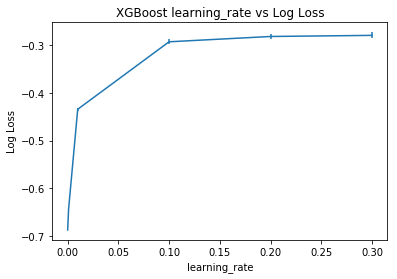

In [121]:
from matplotlib import pyplot
# plot
pyplot.errorbar(learning_rate, means, yerr=stds)
pyplot.title("XGBoost learning_rate vs Log Loss")
pyplot.xlabel('learning_rate')
pyplot.ylabel('Log Loss')
pyplot.savefig('learning_rate.png')

Best: -0.276282 using {'learning_rate': 0.2, 'n_estimators': 300}
-0.687807 (0.000054) with: {'learning_rate': 0.0001, 'n_estimators': 100}
-0.682571 (0.000106) with: {'learning_rate': 0.0001, 'n_estimators': 200}
-0.677436 (0.000158) with: {'learning_rate': 0.0001, 'n_estimators': 300}
-0.672401 (0.000209) with: {'learning_rate': 0.0001, 'n_estimators': 400}
-0.667463 (0.000260) with: {'learning_rate': 0.0001, 'n_estimators': 500}
-0.644124 (0.000502) with: {'learning_rate': 0.001, 'n_estimators': 100}
-0.603462 (0.000958) with: {'learning_rate': 0.001, 'n_estimators': 200}
-0.569392 (0.001370) with: {'learning_rate': 0.001, 'n_estimators': 300}
-0.540551 (0.001722) with: {'learning_rate': 0.001, 'n_estimators': 400}
-0.515865 (0.002029) with: {'learning_rate': 0.001, 'n_estimators': 500}
-0.434316 (0.003073) with: {'learning_rate': 0.01, 'n_estimators': 100}
-0.364897 (0.003838) with: {'learning_rate': 0.01, 'n_estimators': 200}
-0.336826 (0.003983) with: {'learning_rate': 0.01, 'n_e

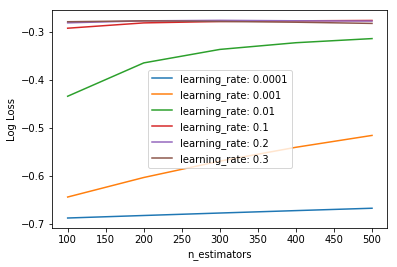

In [122]:
# This xgboost code is where I experiment which learning rate and what number of estimators are BEST
# Problem 2: 
# Which factors are important 

from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
import matplotlib
import numpy
from matplotlib import pyplot
from pandas import read_csv
# grid search

model = XGBClassifier()
n_estimators = [100, 200, 300, 400, 500]
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
param_grid = dict(learning_rate=learning_rate, n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    
# plot results
scores = numpy.array(means).reshape(len(learning_rate), len(n_estimators))

for i, value in enumerate(learning_rate):
    pyplot.plot(n_estimators, scores[i], label='learning_rate: ' + str(value))
pyplot.legend()
pyplot.xlabel('n_estimators')
pyplot.ylabel('Log Loss')
pyplot.savefig('n_estimators_vs_learning_rate.png')

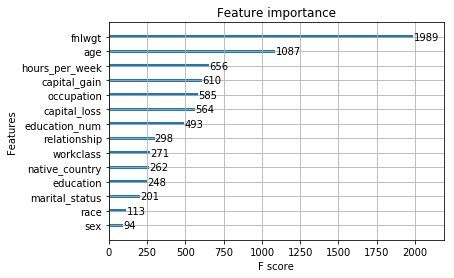

training set auc: 0.8667280822969445
test set auc: 0.8667280822969445
{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 5, 'min_child_weight': 4, 'missing': None, 'n_estimators': 500, 'n_jobs': 1, 'nthread': None, 'objective': 'binary:logistic', 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': None, 'silent': True, 'subsample': 1}
The Accuracy  is 0.8667280822969445


In [123]:
# XGboost - Picking the best values for learning rate and estimators  

import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
model = xgb.XGBClassifier(learning_rate=0.1,
                           n_estimators=500,
                           max_depth=5,
                           min_child_weight=4
                           )
final_m=model.fit(X_train, y_train)
xgb.plot_importance(final_m)
plt.show()
predictions = model.predict(X_test)
print("training set auc:",accuracy_score(y_test, predictions))
predictions = model.predict(X_test)
print("test set auc:",accuracy_score(y_test, predictions))
print(model.get_params())

XGBA = accuracy_score(y_test, predictions)
print("The Accuracy  is {}".format(XGBA))

In [125]:
# Problem 1: 
# Prediction task is to determine whether a person makes over 50K a year. 
 
#Person is 25 years old, working as private job as Machine-op-inspct, Person is male, his education_num is 7
#He has passed 11th, his race is black, his capital gain and capital loss is 0,he Never-married
#He works 40 hours per week and his native country is United-States, his fnlwgt is 226802

wage_class_pred = bst.predict(pd.DataFrame(np.array([[25, 3, 226802, 1, 7, 4, 6, 3, 2, 1, 0, 0, 40, 37]]), columns=test_features.columns))
print("\nThe predicted wage_class is:",wage_class_pred[0] )
print("\n")



The predicted wage_class is: False




In [128]:
#Person is 35 years old, working as Self-emp-inc job as Exec-managerial, Person is male, his education_num is 13
#He has passed Bachelors, his race is white, his capital gain and capital loss is 0, his marital_status is Married-civ-spouse and he is husband
#He works 60 hours per week and his native country is United-States, his fnlwgt is 182148

wage_class_pred = bst.predict(pd.DataFrame(np.array([[35, 4, 482148, 9, 13, 2, 3, 0, 4, 1, 0, 0, 60, 37]]), columns=test_features.columns))
print("\nThe predicted wage_class is:",wage_class_pred[0] )
print("\n")


The predicted wage_class is: True




In [127]:
# Problem 2: 
# Which factors are important 
coff=pd.DataFrame(lm.coef_).T 
col=pd.DataFrame(col_labels).T 
print("The coefficient for all features:", coff)
print("The column names:",col)


The coefficient for all features:          0         1             2         3         4        5         6   \
0  0.004712 -0.012742  4.872838e-08 -0.003736  0.046811 -0.02386  0.001495   

         7         8         9         10        11        12        13  
0 -0.016464  0.013605  0.106106  0.000009  0.000108  0.003527 -0.000415  
The column names:     0          1       2          3              4               5   \
0  age  workclass  fnlwgt  education  education_num  marital_status   

           6             7     8    9             10            11  \
0  occupation  relationship  race  sex  capital_gain  capital_loss   

               12              13          14  
0  hours_per_week  native_country  wage_class  


In [ ]:
# Problem 2: 
# Which factors are important 
 
The factors which are <0.05 of co-oefficient we can consider as important. All are having <0.05 so all features are important.



In [ ]:
# Problem 3: 
# Which algorithms are best for this dataset 
The Accuracy for Logistic Regression is 0.7363734070320896
The Accuracy for LDA is 0.8108398587440504
The Accuracy for Linear Regression is 0.806540764624597
The Accuracy for KNN is 0.7678489175495163
The Accuracy for Decision Tree Model is 0.8606817483877572
The Accuracy for SVM is 0.7907262398280362
The Accuracy for NB is 0.7933364041148472
The Accuracy for Neural Network is 0.7861200675571933
The Accuracy for kmeans is 0.622140334715185
The Accuracy for XGBoost is 0.8667280822969445

From all the models the best is XGboost with 86.67% accuracy followed by Decision tree witH 86.07% 